In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import load_model

In [ ]:
df=pd.read_csv("./gemini_BTCUSD_1hr.csv")

In [ ]:
df.head

<bound method NDFrame.head of                    Date  Symbol      Open  ...       Low     Close      Volume
0      08-10-2015 13:00  BTCUSD      0.00  ...      0.00    245.00    0.606654
1      08-10-2015 14:00  BTCUSD    245.00  ...    244.50    245.00    4.453649
2      08-10-2015 15:00  BTCUSD    245.00  ...    244.92    244.92    3.016926
3      08-10-2015 16:00  BTCUSD    244.92  ...    244.25    244.25    3.895252
4      08-10-2015 17:00  BTCUSD    244.25  ...    244.02    244.99    3.920632
...                 ...     ...       ...  ...       ...       ...         ...
48988  10-05-2021 20:00  BTCUSD  55715.91  ...  53434.31  55321.30  570.426895
48989  10-05-2021 21:00  BTCUSD  55321.30  ...  55126.58  55800.04   62.493009
48990  10-05-2021 22:00  BTCUSD  55800.04  ...  55500.00  56290.72   60.883336
48991  10-05-2021 23:00  BTCUSD  56290.72  ...  55560.00  55882.44   61.036156
48992  11-05-2021 00:00  BTCUSD  55882.44  ...  55820.13  55861.40    7.048941

[48993 rows x 7 colum

In [ ]:
del df['Date']
del df['Symbol']

In [ ]:
df.head()

,Open,High,Low,Close,Volume
0,0.00,245.00,0.00,245.00,0.606654
1,245.00,245.00,244.50,245.00,4.453649
2,245.00,245.00,244.92,244.92,3.016926
3,244.92,244.92,244.25,244.25,3.895252
4,244.25,244.99,244.02,244.99,3.920632


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48993 entries, 0 to 48992
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    48993 non-null  float64
 1   High    48993 non-null  float64
 2   Low     48993 non-null  float64
 3   Close   48993 non-null  float64
 4   Volume  48993 non-null  float64
dtypes: float64(5)
memory usage: 1.9 MB


In [ ]:
df.shape

(48993, 5)

In [ ]:
n_train_rows = int(df.shape[0]*.8)-1

In [ ]:
train = df.iloc[:n_train_rows, :]
test = df.iloc[n_train_rows:, :]

In [ ]:
print(train.shape)
print(test.shape)

(39193, 5)
(9800, 5)


In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train.values)
test_set_scaled = sc.fit_transform(test.values)

In [ ]:
steps = 50
x_train = []
y_train = []
x_test = []
y_test = []

In [ ]:
for i in range(steps, training_set_scaled.shape[0]-steps):
    x_train.append(training_set_scaled[i-steps:i, :])
    y_train.append(training_set_scaled[i, :])

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)

(39093, 50, 5)


In [ ]:
for i in range(steps, test_set_scaled.shape[0]):
    x_test.append(test_set_scaled[i-steps:i, :])
    y_test.append(test_set_scaled[i, :])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)

(9750, 50, 5)


In [ ]:
x_train.shape

(39093, 50, 5)

In [ ]:
modeldays=Sequential()

In [ ]:
epochs = 10

modeldays.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1],5)))
modeldays.add(Dropout(0.2))
modeldays.add(LSTM(units=50, return_sequences = True))
modeldays.add(Dropout(0.2))
modeldays.add(LSTM(units=50, return_sequences = True))
modeldays.add(Dropout(0.2))
modeldays.add(LSTM(units=50))
modeldays.add(Dropout(0.2))
modeldays.add(Dense(units=5))
modeldays.compile(loss="mse", optimizer="adam")
modeldays.fit(x_train, y_train, batch_size = 32, epochs = epochs)
modeldays.summary

Epoch 1/10
1222/1222 [==============================] - 118s 91ms/step - loss: 0.0016
Epoch 2/10
1222/1222 [==============================] - 112s 91ms/step - loss: 7.1013e-04
Epoch 3/10
1222/1222 [==============================] - 112s 91ms/step - loss: 6.1673e-04
Epoch 4/10
1222/1222 [==============================] - 111s 91ms/step - loss: 5.6226e-04
Epoch 5/10
1222/1222 [==============================] - 111s 91ms/step - loss: 5.4612e-04
Epoch 6/10
1222/1222 [==============================] - 112s 91ms/step - loss: 5.2136e-04
Epoch 7/10
1222/1222 [==============================] - 112s 91ms/step - loss: 5.1146e-04
Epoch 8/10
1222/1222 [==============================] - 111s 91ms/step - loss: 5.0410e-04
Epoch 9/10
1222/1222 [==============================] - 111s 91ms/step - loss: 4.8378e-04
Epoch 10/10
1222/1222 [==============================] - 111s 91ms/step - loss: 4.8831e-04


<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f275d34a910>>

In [ ]:
modeldays.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [ ]:
results = modeldays.evaluate(x_test, y_test, batch_size=32)


305/305 [==============================] - 8s 22ms/step - loss: 4.3868e-04


In [ ]:
y_pred = modeldays.predict(x_test)
y_pred = sc.inverse_transform(y_pred)

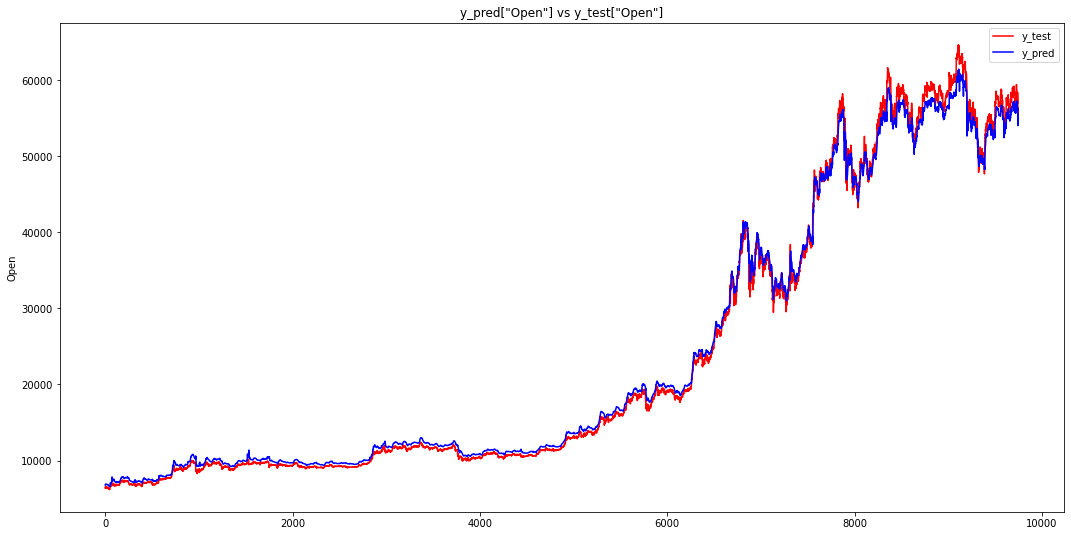

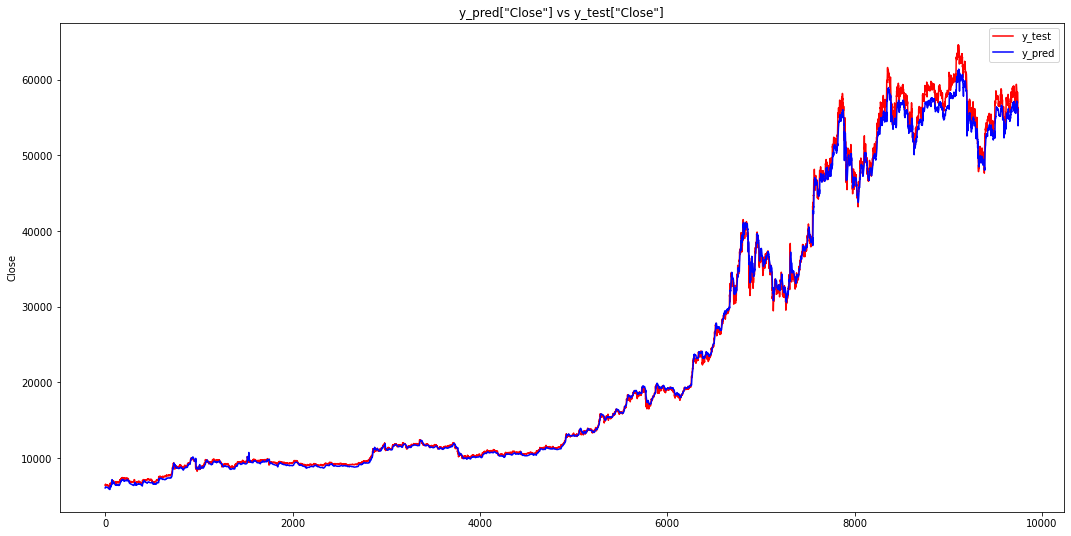

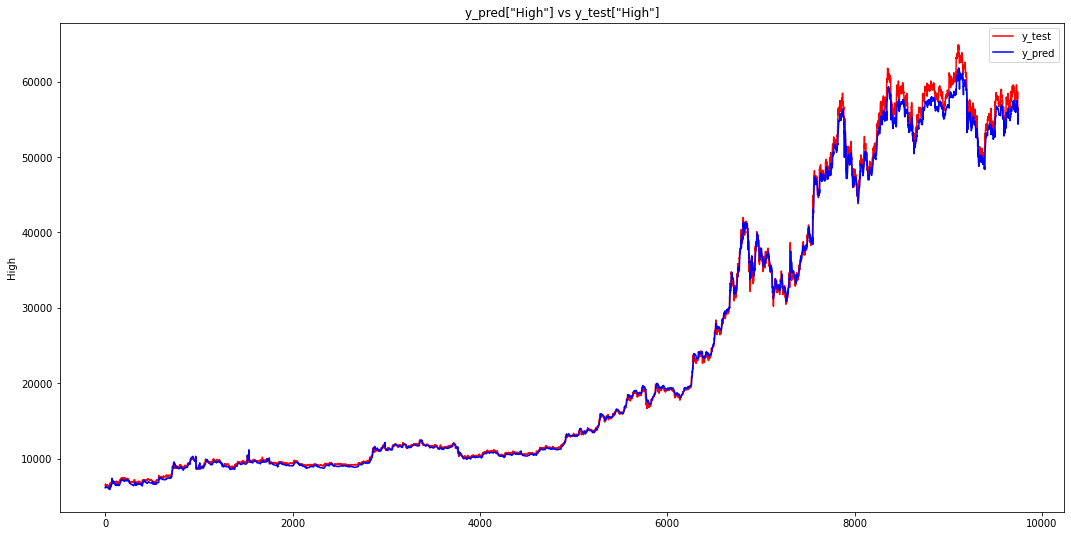

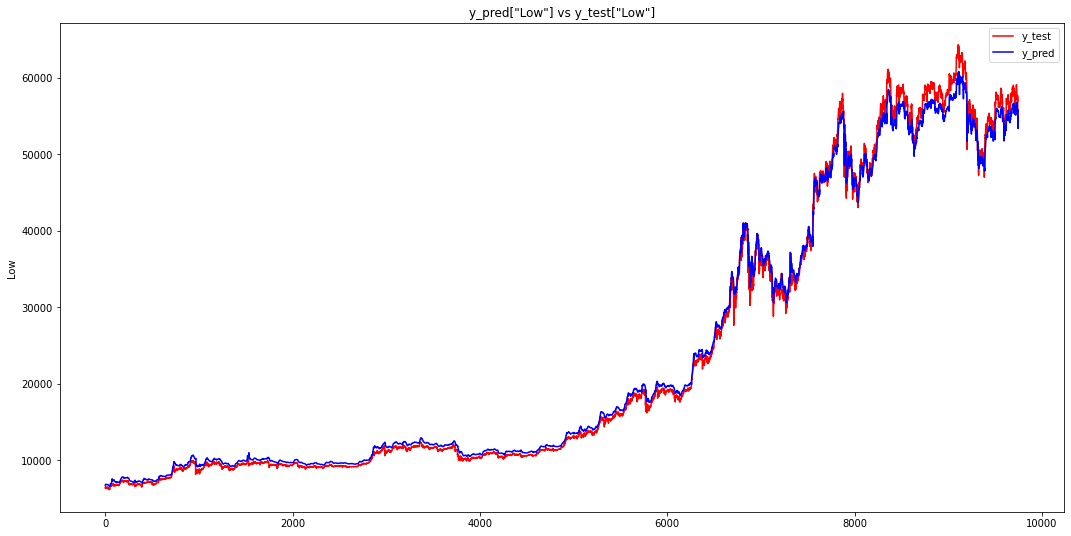

In [ ]:
y_test = test[steps:].reset_index()


plt.figure(figsize = (18,9))
plt.plot(y_test['Open'], color = 'red', label = 'y_test')
plt.plot(y_pred[:,0], color = 'blue', label = 'y_pred')
plt.title('y_pred["Open"] vs y_test["Open"]')
plt.ylabel('Open')
plt.legend()
plt.show()


plt.figure(figsize = (18,9))
plt.plot(y_test['Close'], color = 'red', label = 'y_test')
plt.plot(y_pred[:,3], color = 'blue', label = 'y_pred')
plt.title('y_pred["Close"] vs y_test["Close"]')
plt.ylabel('Close')
plt.legend()
plt.show()


plt.figure(figsize = (18,9))
plt.plot(y_test['High'], color = 'red', label = 'y_test')
plt.plot(y_pred[:,1], color = 'blue', label = 'y_pred')
plt.title('y_pred["High"] vs y_test["High"]')
plt.ylabel('High')
plt.legend()
plt.show()


plt.figure(figsize = (18,9))
plt.plot(y_test['Low'], color = 'red', label = 'y_test')
plt.plot(y_pred[:,2], color = 'blue', label = 'y_pred')
plt.title('y_pred["Low"] vs y_test["Low"]')
plt.ylabel('Low')
plt.legend()
plt.show()